In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import fitz

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

from pprint import pprint

import util
import lines
import classification

In [2]:
test_files_dir = ".././test_files/"
test_files = util.list_files(test_files_dir)
test_files

['.././test_files/LS_index_1944.pdf',
 '.././test_files/LS_index_1986_split.pdf',
 '.././test_files/Argentinia_LS_index_1934_test_I_DE.pdf',
 '.././test_files/LS_index_1976.pdf',
 '.././test_files/LS_index_1920.pdf',
 '.././test_files/LS_index_1986.pdf',
 '.././test_files/LS_index_1937.pdf',
 '.././test_files/LS_index_1920_split.pdf',
 '.././test_files/LS_index_1944_split.pdf']

In [3]:
p_start = 3
pages, dicts = util.read_pdf(test_files[0], p_start)

l_df = lines.make_lines_df(dicts)
l_df = lines.merge_close_lines(l_df)
l_df = lines.remove_useless_lines(l_df)

display(l_df)

Reading pdf from .././test_files/LS_index_1944.pdf
...
Finished reading 80 page(s)


,line_text,spans,x0,y0,x1,y1,page
0,1.—LIST OF LAWS AND ORDERS OF 1944 NOT PUBLISH...,[1.—LIST OF LAWS AND ORDERS OF 1944 NOT PUBLIS...,35.0,94.69,342.19,104.79,3
1,"LEGISLATIVE SERIES FOR THAT YEAR WHICH AMEND, RE","[LEGISLATIVE SERIES FOR THAT YEAR WHICH AMEND,...",48.0,104.29,336.14,114.79,3
2,PEAL OR SUPERSEDE LA\VS AND ORDERS PUBLISHED PRE,[PEAL OR SUPERSEDE LA\VS AND ORDERS PUBLISHED ...,49.0,114.39,338.64,124.89,3
3,VIOUSLY IN THE LEGISLATIVE SERIES,[VIOUSLY IN THE LEGISLATIVE SERIES],48.0,124.46,236.91,134.86,3
4,ARGENTINE REPUBLIC,[ARGENTINE REPUBLIC],26.0,147.26,151.34,158.86,3
...,...,...,...,...,...,...,...
4320,Apr. 28 L.D. respecting the organisation of la...,"[Apr. 28, L.D., respecting the organisation of...",62.0,528.92,369.30,539.32,82
4321,agreements; labour courts]. No. 311. (Zb. pp. ...,"[agreements; labour courts]., No. 311., (Zb. p...",109.0,537.12,337.55,547.49,82
4322,G.O. = Gacefa Oficial de los Unmdos de Venezuela.,"[G.O. =, Gacefa, Oficial de los, Unmdos de Ven...",63.0,552.82,296.01,563.62,82
4323,Zb. = Zbornile zakona i naredaba.,"[Zb. =, Zbornile, zakona, i, naredaba.]",62.0,562.45,195.35,573.75,82


In [4]:
bins_x0, bins_x1, x0_n = classification.group_line_starts_ends(l_df)
display(x0_n, bins_x0, bins_x1)

3

,x0,lines,last_x0,count,page
5,"[26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 28.0, 27....","[4, 22, 30, 38, 39, 40, 41, 45, 46, 47]",28.0,10,3
7,"[35.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36....","[0, 6, 11, 18, 24, 26, 31, 36, 37, 42]",35.0,10,3
3,"[80.0, 80.0, 80.0, 81.0, 80.0, 80.0, 80.0, 81....","[7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, ...",82.0,19,3
3,"[47.0, 49.0, 50.0, 50.0, 50.0, 51.0, 51.0, 51....","[48, 49, 64, 68, 75, 79, 89, 90, 91, 92, 93, 9...",51.0,19,4
2,"[58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 59.0, 59....","[50, 54, 58, 65, 69, 76, 80, 85, 95]",60.0,9,4
...,...,...,...,...,...
4,"[23.0, 23.0, 23.0, 24.0, 24.0, 24.0, 24.0, 24....","[4215, 4219, 4223, 4227, 4230, 4234, 4237, 424...",26.0,14,81
3,"[69.0, 69.0, 69.0, 69.0, 70.0, 69.0, 69.0, 70....","[4216, 4217, 4218, 4220, 4221, 4222, 4224, 422...",71.0,35,81
0,"[54.0, 54.0]","[4314, 4315]",54.0,2,82
6,"[55.0, 54.0, 56.0, 60.0, 63.0, 63.0, 62.0, 63....","[4267, 4268, 4297, 4309, 4317, 4318, 4320, 432...",63.0,10,82


,x1,lines,last_x1,count,page
15,"[342.19, 338.64, 340.15, 339.66, 340.92, 340.2...","[0, 2, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18,...",341.23,30,3
10,"[364.39, 365.77, 365.53, 364.94, 364.62, 365.1...","[50, 51, 52, 54, 55, 56, 58, 59, 60, 61, 62, 6...",365.55,37,4
18,"[344.22, 342.88, 342.88, 343.64, 342.57, 342.7...","[103, 105, 106, 107, 111, 112, 117, 118, 121, ...",341.44,31,5
17,"[368.16, 368.79, 368.92, 368.63, 368.64, 368.0...","[162, 163, 168, 170, 171, 173, 174, 178, 182, ...",368.64,25,6
16,"[327.4, 325.91, 325.98, 326.49, 326.08, 326.78...","[210, 212, 213, 214, 215, 217, 218, 220, 221, ...",327.85,31,7
...,...,...,...,...,...
11,"[379.6, 380.17, 380.35, 379.0, 380.11, 380.46,...","[4047, 4048, 4049, 4050, 4051, 4052, 4053, 405...",375.05,39,78
9,"[326.73, 326.84, 327.21, 326.62, 326.06, 326.3...","[4101, 4103, 4104, 4105, 4106, 4107, 4109, 411...",323.36,44,79
11,"[377.02, 376.64, 376.83, 377.64, 376.42, 376.7...","[4161, 4162, 4163, 4165, 4166, 4167, 4168, 417...",374.36,41,80
10,"[328.74, 329.31, 329.32, 329.17, 326.22, 327.5...","[4214, 4215, 4216, 4217, 4219, 4220, 4221, 422...",330.93,33,81


In [5]:
li_df = classification.assign_types(l_df, bins_x0, bins_x1, x0_n)
#li_df.to_csv("second_labeling_1944_full.csv")
li_df.head(20)

,line_text,spans,x0,y0,x1,y1,page,x0_type,x1_type
0,1.—LIST OF LAWS AND ORDERS OF 1944 NOT PUBLISH...,[1.—LIST OF LAWS AND ORDERS OF 1944 NOT PUBLIS...,35.0,94.69,342.19,104.79,3,1,2
1,"LEGISLATIVE SERIES FOR THAT YEAR WHICH AMEND, RE","[LEGISLATIVE SERIES FOR THAT YEAR WHICH AMEND,...",48.0,104.29,336.14,114.79,3,-1,1
2,PEAL OR SUPERSEDE LA\VS AND ORDERS PUBLISHED PRE,[PEAL OR SUPERSEDE LA\VS AND ORDERS PUBLISHED ...,49.0,114.39,338.64,124.89,3,-1,2
3,VIOUSLY IN THE LEGISLATIVE SERIES,[VIOUSLY IN THE LEGISLATIVE SERIES],48.0,124.46,236.91,134.86,3,-1,1
4,ARGENTINE REPUBLIC,[ARGENTINE REPUBLIC],26.0,147.26,151.34,158.86,3,0,0
5,FEDERAL GOVERNMENT,[FEDERAL GOVERNMENT],127.0,163.84,243.31,173.74,3,-1,1
6,"June 3 Decree No. 13,943/44, to repeal section...","[June 3, Decree No. 13,943/44, to repeal secti...",34.0,178.21,340.15,187.99,3,1,2
7,"watchmen] of Decree No. 562 of 31st December, ...","[watchmen] of Decree No. 562 of 31st December,...",80.0,186.46,339.66,196.06,3,2,2
8,the hours of work of persons engaged in mariti...,[the hours of work of persons engaged in marit...,80.0,193.84,340.92,204.54,3,2,2
9,navigation and dock and harbour services. (B.O...,"[navigation and dock and harbour services., (B...",80.0,202.66,340.20,212.46,3,2,2


In [6]:
cli_df = classification.correct_x0_types(li_df, bins_x0, bins_x1)
ll_df = classification.assign_labels(cli_df, x0_n)
ll_df

,line_text,spans,x0,y0,x1,y1,page,x0_type,x1_type,label
0,1.—LIST OF LAWS AND ORDERS OF 1944 NOT PUBLISH...,[1.—LIST OF LAWS AND ORDERS OF 1944 NOT PUBLIS...,35.0,94.69,342.19,104.79,3,1,2,start
1,"LEGISLATIVE SERIES FOR THAT YEAR WHICH AMEND, RE","[LEGISLATIVE SERIES FOR THAT YEAR WHICH AMEND,...",48.0,104.29,336.14,114.79,3,-1,1,other
2,PEAL OR SUPERSEDE LA\VS AND ORDERS PUBLISHED PRE,[PEAL OR SUPERSEDE LA\VS AND ORDERS PUBLISHED ...,49.0,114.39,338.64,124.89,3,-1,2,other
3,VIOUSLY IN THE LEGISLATIVE SERIES,[VIOUSLY IN THE LEGISLATIVE SERIES],48.0,124.46,236.91,134.86,3,-1,1,other
4,ARGENTINE REPUBLIC,[ARGENTINE REPUBLIC],26.0,147.26,151.34,158.86,3,0,0,country
...,...,...,...,...,...,...,...,...,...,...
4320,Apr. 28 L.D. respecting the organisation of la...,"[Apr. 28, L.D., respecting the organisation of...",62.0,528.92,369.30,539.32,82,1,2,start
4321,agreements; labour courts]. No. 311. (Zb. pp. ...,"[agreements; labour courts]., No. 311., (Zb. p...",109.0,537.12,337.55,547.49,82,2,1,end
4322,G.O. = Gacefa Oficial de los Unmdos de Venezuela.,"[G.O. =, Gacefa, Oficial de los, Unmdos de Ven...",63.0,552.82,296.01,563.62,82,1,1,other
4323,Zb. = Zbornile zakona i naredaba.,"[Zb. =, Zbornile, zakona, i, naredaba.]",62.0,562.45,195.35,573.75,82,1,0,other


In [55]:
classification.improve_classification(ll_df)

,line_text,spans,x0,y0,x1,y1,page,x0_type,x1_type,label,new_label,date
0,1.—LIST OF LAWS AND ORDERS OF 1944 NOT PUBLISH...,[1.—LIST OF LAWS AND ORDERS OF 1944 NOT PUBLIS...,35.0,94.69,342.19,104.79,3,1,2,start,other,
1,"LEGISLATIVE SERIES FOR THAT YEAR WHICH AMEND, RE","[LEGISLATIVE SERIES FOR THAT YEAR WHICH AMEND,...",48.0,104.29,336.14,114.79,3,-1,1,other,other,
2,PEAL OR SUPERSEDE LA\VS AND ORDERS PUBLISHED PRE,[PEAL OR SUPERSEDE LA\VS AND ORDERS PUBLISHED ...,49.0,114.39,338.64,124.89,3,-1,2,other,other,
3,VIOUSLY IN THE LEGISLATIVE SERIES,[VIOUSLY IN THE LEGISLATIVE SERIES],48.0,124.46,236.91,134.86,3,-1,1,other,other,
4,ARGENTINE REPUBLIC,[ARGENTINE REPUBLIC],26.0,147.26,151.34,158.86,3,0,0,country,country,
...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Apr. 28 L.D. respecting the organisation of la...,"[Apr. 28, L.D., respecting the organisation of...",62.0,528.92,369.30,539.32,82,1,2,start,start,Apr. 28
4321,agreements; labour courts]. No. 311. (Zb. pp. ...,"[agreements; labour courts]., No. 311., (Zb. p...",109.0,537.12,337.55,547.49,82,2,1,end,end,
4322,G.O. = Gacefa Oficial de los Unmdos de Venezuela.,"[G.O. =, Gacefa, Oficial de los, Unmdos de Ven...",63.0,552.82,296.01,563.62,82,1,1,other,other,
4323,Zb. = Zbornile zakona i naredaba.,"[Zb. =, Zbornile, zakona, i, naredaba.]",62.0,562.45,195.35,573.75,82,1,0,other,other,


In [7]:
lines_df = classification.generate_cluster_labels(l_df, dicts, 2)
lines_df

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label
0,1944—Indexes I — 4 —,"[1944—Indexes I, —, 4, —]",47.0,48.06,221.90,57.31,1,1,0,other
1,Queensland,[Queensland],49.0,66.06,102.92,76.06,1,1,2,country
2,Dec. 1 An Act to suspend certain provisions of...,"[Dec. 1, An Act to suspend certain provisions ...",58.0,82.71,364.39,93.01,1,1,1,start
3,"Insurance Acts, 1922 to 19368, and for purpose...","[Insurance Acts, 1922 to 19368, and for purpos...",105.0,90.69,365.77,100.39,1,0,1,middle
4,"8 Geo. VI, No. 14. The Unemployed Workers Insu...","[8 Geo. VI, No. 14., The Unemployed Workers In...",105.0,98.59,365.53,109.34,1,0,1,middle
...,...,...,...,...,...,...,...,...,...,...
340,"the national territory. (B.O. 18th December, 1...","[the national, territory., (B.O., 18th Decembe...",121.0,524.04,381.10,534.04,6,0,1,middle
341,pp. 20-22) Arg. 2 (A),"[pp. 20-22), Arg. 2 (A)]",120.0,532.39,379.77,542.59,6,0,1,middle
342,B.O. = Boletin Of icial de Ia Argentina.,"[B.O. =, Boletin, Of icial de Ia, Argentina.]",74.0,549.91,269.09,560.61,6,1,0,other
343,"4L.S. 1929 (Arg. 1, A); 1930 (Arg. 1, A). — 19...","[4L.S. 1929 (Arg. 1, A); 1930 (Arg., 1, A). —,...",73.0,572.39,366.26,583.29,6,1,1,start


In [41]:
impr_df = classification.improve_classification(lines_df)
impr_df

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label,new_label,date
0,1944—Indexes I — 4 —,"[1944—Indexes I, —, 4, —]",47.0,48.06,221.90,57.31,1,1,2,other,other,
1,Queensland,[Queensland],49.0,66.06,102.92,76.06,1,1,1,country,region,
2,Dec. 1 An Act to suspend certain provisions of...,"[Dec. 1, An Act to suspend certain provisions ...",58.0,82.71,364.39,93.01,1,1,0,start,start,Dec. 1
3,"Insurance Acts, 1922 to 19368, and for purpose...","[Insurance Acts, 1922 to 19368, and for purpos...",105.0,90.69,365.77,100.39,1,0,0,middle,middle,
4,"8 Geo. VI, No. 14. The Unemployed Workers Insu...","[8 Geo. VI, No. 14., The Unemployed Workers In...",105.0,98.59,365.53,109.34,1,0,0,middle,middle,
...,...,...,...,...,...,...,...,...,...,...,...,...
329,"the national territory. (B.O. 18th December, 1...","[the national, territory., (B.O., 18th Decembe...",121.0,524.04,381.10,534.04,6,0,0,middle,middle,
330,pp. 20-22) Arg. 2 (A),"[pp. 20-22), Arg. 2 (A)]",120.0,532.39,379.77,542.59,6,0,0,middle,middle,
331,B.O. = Boletin Of icial de Ia Argentina.,"[B.O. =, Boletin, Of icial de Ia, Argentina.]",74.0,549.91,269.09,560.61,6,1,2,other,other,
332,"4L.S. 1929 (Arg. 1, A); 1930 (Arg. 1, A). — 19...","[4L.S. 1929 (Arg. 1, A); 1930 (Arg., 1, A). —,...",73.0,572.39,366.26,583.29,6,1,0,start,other,


In [27]:
impr_df.loc[impr_df["label"] == "country"]

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label,new_label,date
0,AU5TRJA—conhjflued,[AU5TRJA—conhjflued.],48.0,25.28,123.92,32.98,1,1,0,country,region,
79,COSTA RICA,[COSTA RICA.],47.0,26.62,94.49,34.32,2,1,0,country,country,
82,CZECIIO-SL0VAKIA,[CZECIIO-SL0VAKIA.],47.0,59.98,115.56,67.28,2,1,0,country,country,
99,DENMARK,[DENMARK.],51.0,218.38,89.53,225.68,2,1,0,country,country,
110,FINLANu,[FINLANu.],52.0,312.45,86.44,320.25,2,1,0,country,country,
122,FRANCE,[FRANCE.],51.0,415.25,82.04,422.65,2,1,0,country,country,
149,FRANcE—conhinued,[FRANcE—conhinued.],50.0,27.14,124.02,35.24,3,1,0,country,region,
172,GEORGIA,[GEORGIA.],49.0,212.33,83.62,219.33,3,1,0,country,country,
174,GE RMANv,"[GE, RMANv.]",49.0,236.12,88.00,243.32,3,1,0,country,country,
231,HUNGARY,[HUNGARY.],59.0,118.00,98.06,125.40,4,1,0,country,country,


In [51]:
impr_df.loc[impr_df["new_label"] == "start"]

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label,new_label,date
2,Dec. 1 An Act to suspend certain provisions of...,"[Dec. 1, An Act to suspend certain provisions ...",58.0,82.71,364.39,93.01,1,1,0,start,start,Dec. 1
6,Dec. 14 An Act to amend the Workers' Compensat...,"[Dec. 14, An Act to amend the Workers' Compens...",58.0,121.11,364.94,131.34,1,1,0,start,start,Dec. 14
10,"Dec. 14 An Act to provide that persons who, du...","[Dec. 14, An Act to provide, that persons who,...",58.0,158.34,364.94,169.74,1,1,0,start,start,Dec. 14
17,Dec. 14 An Act to amend the Workmen's Compensa...,"[Dec. 14, An Act to amend the Workmen's Compen...",58.0,233.56,317.22,243.84,1,1,0,start,start,Dec. 14
27,Mar. 25 Legislative Order to amend sections 26...,"[Mar. 25, Legislative Order to amend sections ...",59.0,335.41,366.06,345.91,1,1,0,start,start,Mar. 25
31,Nov. 23 Act to fix a date for the calculation ...,"[Nov. 23, Act to fix a date for the calculatio...",59.0,383.26,365.06,393.66,1,1,0,start,start,Nov. 23
36,Dec. 29 Act to mike an addition to section 88 ...,"[Dec. 29, Act to mike an addition to section 8...",59.0,429.49,366.65,440.39,1,1,0,start,start,Dec. 29
56,Sept. 1 Act to amend [section 1 of] the Act of...,"[Sept. 1, Act to amend [section 1 of] the Act ...",60.0,88.99,368.16,98.69,2,1,0,start,start,Sept. 1
59,Sept. 29 Order to amend [section 5 of] the Ord...,"[Sept. 29, Order to amend [section 5 of], the ...",62.0,118.31,340.95,129.24,2,1,0,start,start,Sept. 29
62,"Dec. 29 Act to amend the Act of 30th April, 19...","[Dec. 29, Act to amend the Act of 30th, April,...",61.0,148.09,368.92,159.39,2,1,0,start,start,Dec. 29


In [9]:
#lines_df.to_csv("first_labeling_1920.csv")

In [42]:
l = lines_df.copy()
k = classification.generate_cluster_labels(l, dicts, 3)
k.head(20)

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label
0,1944—Indexes I — 4 —,"[1944—Indexes I, —, 4, —]",47.0,48.06,221.90,57.31,1,0,1,other
1,Queensland,[Queensland],49.0,66.06,102.92,76.06,1,0,2,country
2,Dec. 1 An Act to suspend certain provisions of...,"[Dec. 1, An Act to suspend certain provisions ...",58.0,82.71,364.39,93.01,1,0,0,start
3,"Insurance Acts, 1922 to 19368, and for purpose...","[Insurance Acts, 1922 to 19368, and for purpos...",105.0,90.69,365.77,100.39,1,2,0,middle
4,"8 Geo. VI, No. 14. The Unemployed Workers Insu...","[8 Geo. VI, No. 14., The Unemployed Workers In...",105.0,98.59,365.53,109.34,1,2,0,middle
5,Amendment Act of 1944.,[Amendment Act of 1944.],105.0,107.51,201.08,116.91,1,2,1,end
6,Dec. 14 An Act to amend the Workers' Compensat...,"[Dec. 14, An Act to amend the Workers' Compens...",58.0,121.11,364.94,131.34,1,0,0,start
7,in certain particulars [compensation for certa...,[in certain particulars [compensation for cert...,105.0,129.24,364.62,138.74,1,2,0,middle
8,for hospital and medical treatmenti. 9 Geo. VI...,"[for hospital and medical treatmenti., 9 Geo. ...",105.0,135.74,365.15,147.34,1,2,0,middle
9,Workers' Compensation Acts Amendment Act of 194&,[Workers' Compensation Acts Amendment Act of 1...,106.0,145.19,321.66,154.89,1,2,0,middle


In [43]:
kmeans = classification.cluster(l, "x0", n_clusters=2)
kmeans.inertia_/2

11737.90097189388

In [44]:
kmeans0 = classification.cluster(l, "x0", n_clusters=3)
kmeans0.inertia_/3

5174.451112594571

<AxesSubplot:xlabel='label_kmeans_0', ylabel='x0'>

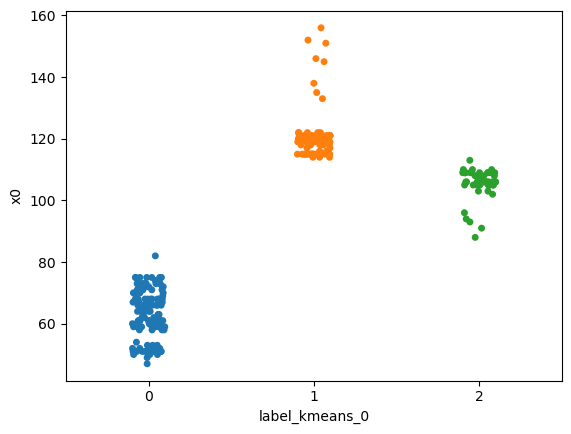

In [45]:
sns.stripplot(data=k, y = "x0", x = "label_kmeans_0")

<AxesSubplot:xlabel='label_kmeans_0', ylabel='x0'>

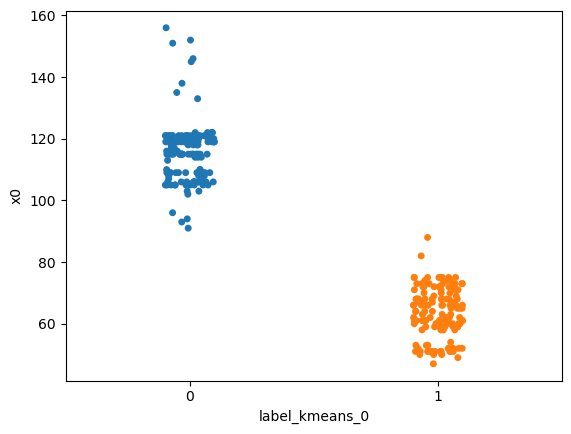

In [46]:
sns.stripplot(data=lines_df, y = "x0", x = "label_kmeans_0")

In [35]:
smallest_x0_label = lines_df.loc[lines_df["label"] == "country"].iloc[0]["label_kmeans_0"]
lines_df_2 = lines_df.copy().loc[lines_df["label_kmeans_0"] == smallest_x0_label]

X0_2 = lines_df_2["x0"].to_numpy()
X0_2 = [[e] for e in X0_2]

kmeans0_2 = KMeans(n_clusters=3).fit(X0_2)

In [36]:
lines_df_2["label_kmeans_0_2"] = kmeans0_2.labels_
lines_df_2.loc[lines_df_2["label_kmeans_0_2"]==0]

,line_text,spans,x0,y0,x1,y1,page,label_kmeans_0,label_kmeans_1,label,label_kmeans_0_2
0,1944—Indexes I — 4 —,"[1944—Indexes I, —, 4, —]",47.0,48.06,221.90,57.31,1,1,0,other,0
1,Queensland,[Queensland],49.0,66.06,102.92,76.06,1,1,1,country,0
16,South Australia,[South Australia],50.0,215.79,125.62,227.89,1,1,1,country,0
20,Tasmania,[Tasmania],50.0,265.94,96.27,277.84,1,1,1,country,0
26,BELGIUM,[BELGIUM],50.0,320.04,102.38,331.54,1,1,1,country,0
30,BOLIVIA,[BOLIVIA],51.0,367.81,97.86,379.21,1,1,1,country,0
40,1927 (Austral. 5); 1930 (Austral. 8); 1931 (Au...,[1927 (Austral. 5); 1930 (Austral. 8); 1931 (A...,51.0,472.61,367.16,482.81,1,1,2,start,0
41,"Act of 11th December, 1936 (1 Edw. VIII, No. 2...","[Act of 11th December, 1936 (1 Edw. VIII, No. ...",51.0,480.91,366.95,490.94,1,1,2,start,0
42,1926 (Austral. 8); 1929 (Austral. 8); 1933 (Au...,[1926 (Austral. 8); 1929 (Austral. 8); 1933 (A...,52.0,488.64,365.53,499.34,1,1,2,start,0
43,1935 (Austral. 8); 1936 (Austral. 5); 1939 (Au...,[1935 (Austral. 8); 1936 (Austral. 5); 1939 (A...,52.0,496.59,367.76,507.49,1,1,2,start,0


<AxesSubplot:xlabel='label_kmeans_0_2', ylabel='x0'>

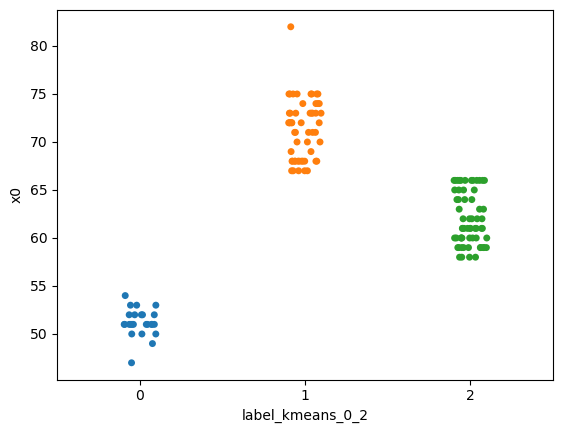

In [37]:
sns.stripplot(data=lines_df_2, y = "x0", x = "label_kmeans_0_2")

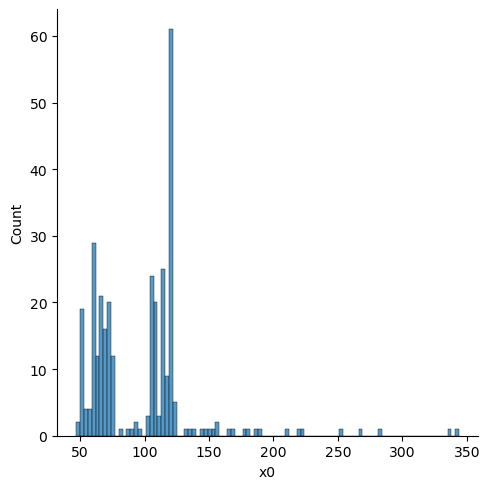

In [13]:
sns.displot(data=lines_df, x = "x0", binwidth=3)

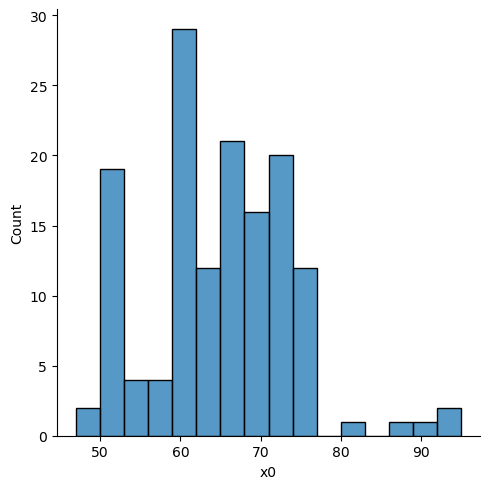

In [14]:
sns.displot(data=lines_df_2, x = "x0", binwidth=3)

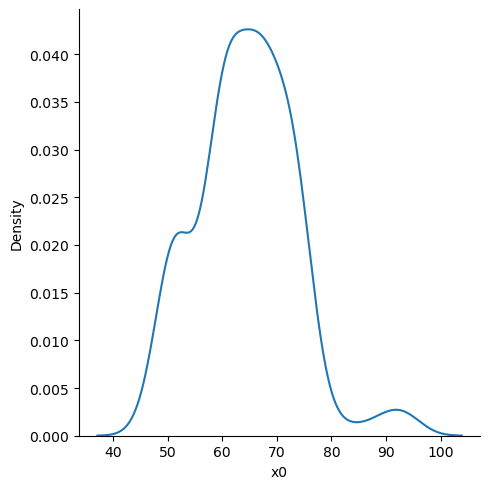

In [15]:
sns.displot(data=lines_df_2, x = "x0", kind="kde")

<AxesSubplot:xlabel='label_kmeans_1', ylabel='x1'>

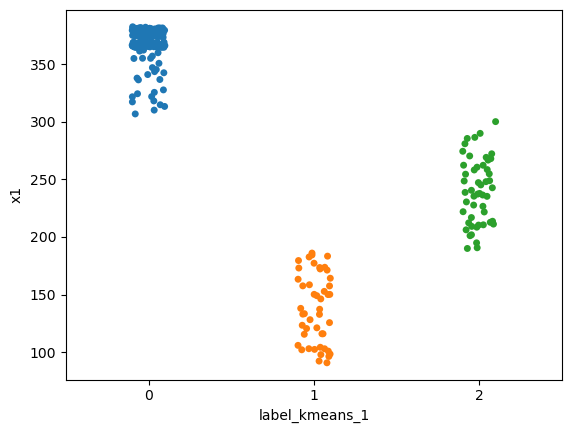

In [16]:
sns.stripplot(data=lines_df, y = "x1", x = "label_kmeans_1")

In [18]:
dicts[3]

{'width': 397.2,
 'height': 646.32,
 'blocks': [{'number': 0,
   'type': 0,
   'bbox': (60.0, 54.7450065612793, 212.6999969482422, 64.64503479003906),
   'lines': [{'spans': [{'size': 8.100000381469727,
       'flags': 4,
       'font': 'Times-Roman',
       'color': 0,
       'ascender': 0.75,
       'descender': -0.25,
       'text': '1944—In dexes I',
       'origin': (60.0, 60.82000732421875),
       'bbox': (60.0,
        54.7450065612793,
        116.23838806152344,
        62.845008850097656)}],
     'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (60.0, 54.7450065612793, 116.23838806152344, 62.845008850097656)},
    {'spans': [{'size': 7.699999809265137,
       'flags': 4,
       'font': 'Times-Roman',
       'color': 0,
       'ascender': 0.75,
       'descender': -0.25,
       'text': '—',
       'origin': (205.0, 62.72003173828125),
       'bbox': (205.0,
        56.945030212402344,
        212.6999969482422,
        64.64503479003906)}],
     'wmode': 0,
     'dir': (1.0, 

In [12]:
print(pages[1750])

(1755)
—
5 —
ARGENTINE REPUBLIC (continued)
FEDERAL GOVERNMENT (continued)
Aug. 28
Act no. 11,896, to set up a National Unemployment Board. (B.O. no. 12,073,
p. 417; no. 12,124, p. 419)
Sept. II
Act no. 21,729, to amend sections 154—160 of the Commercial Code [com-
mercial employees]. (B.O. no. 12,086, p.
Text: Arg. 3
Oct. 8
Act no. 22,104, to provide for the taking of a census of industry for the whole
territory of the Republic.
(B.O. no. 12,112, p. 2052)
Oct. 9
Act no. 22,207, to provide for compulsory treatment and prophylactic measures
for ankylostomiasis.
(B.O. no. 12,140, p. 1202)
Oct. 9
Act no. 12,111, to provide for six weeks' leave with pay before and after
childbirth for women wage-earning and salaried employees of the State.
(DO. no. 12,140, p. 1202)
Oct. ix
Act no. 11929,
to ratify the Convention between the Argentine Republic
and the Kingdom of Denmark concerning reciprocity with respect to the
treatment of workers in matters of compensation for industrial accidents,
signe

## Probleme
- Dokumente mit 2 Spalten
- Dokumente mit Länder-Überschrift über ganze Breite der Seite
- Erkennen, ab welcher Seite die eigentlichen Indexes beginnen
- Unnötigen Anfangstext auf der ersten Seite rausfiltern

## Fragen
- Sollen Regionen auch rausgefiltert werden?
- Sollen zusätzliche Infos in Klammern auch rausgefiltert werden?